<a href="https://www.kaggle.com/code/aliabdelmenam/used-car-price-regreesion?scriptVersionId=196610838" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/aliabdelmonam/Used-Car-Price-for-Regression/blob/main/Regreesion_for_used_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import date
from sklearn.ensemble import IsolationForest

In [2]:
tr= pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
ts= pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')


In [3]:
tr.shape

(188533, 13)

In [4]:
tr.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df_train = copy.deepcopy(tr)
df_test = copy.deepcopy(ts)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# print(df_train['engine'].iloc[:150].to_string())

In [9]:
# for col in df_train.select_dtypes(include='object'):
#     print(col)
#     print(df_train[col].nunique())
#     print(df_train[col].unique())
#     print('-----------------------------------------')

In [10]:
# for col in df_train.select_dtypes(include='object'):
#     print(df_train[col].value_counts().sort_values(ascending=False).head(10))
#     print('----------------------------------------------------')

In [11]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [12]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


> # **EDA**

In [14]:
# cols_dict = {
#       'brand':'brand',
#       'model_year':'model_year',
#       "accident": "accident",
#       "exterior color" : "ext_col",
#       "interior color" : "int_col",
# }
# target='price'

In [15]:
# props1 = "background-color: white; color: maroon; font-weight: bold; "
# props2 = "background-color: white; color: blue; font-weight: bold; "

In [16]:
# for label, col in cols_dict.items():
#   t=tr[[col,target]].groupby(col).agg({target: ["max", "min", "mean", "median", "size"]})
#   display(t.sort_values(by = col, ascending = True).\
#                 transpose().\
#                 style.format(formatter = '{:,.0f}').\
#                 set_caption(f"\nPrice details by {label}\n").\
#                 highlight_max(axis=1, props = props1).\
#                 highlight_min(axis=1, props = props2)
#                  )
#   print("\n\n\n")

In [17]:
# pd.options.display.float_format = '{:.5f}'.format

In [18]:
import re

# **Feature Extraction**

In [19]:
df_train['Horse_power']= df_train['engine'].str.extract(r'(\d+)\.?\d*HP').astype(float)
df_train['Engine_Displacement']= df_train['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
df_train['Cylinder_Count']= df_train['engine'].str.extract(r'(\d+) Cylinder ').astype(float)

df_test['Horse_power']= df_test['engine'].str.extract(r'(\d+)\.?\d*HP').astype(float)
df_test['Engine_Displacement']= df_test['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
df_test['Cylinder_Count']= df_test['engine'].str.extract(r'(\d+) Cylinder ').astype(float)

cylinder_config={'V','Flat','Straight'}
Turbocharger = {'Turbo','Twin Turbo'}
engine_type ={'Gasoline','Electric','Hybrid'}
FUEL_SYSTEMS = {'MPFI', 'GDI', 'PDI', 'TFSI','DOHC', 'SOHC'}

In [20]:
def zoo(word,cylinder_config):
  for i in cylinder_config:
    if i in word:
      return i
  return 'Nan'

In [21]:
df_train['cylinder_config']=df_train['engine'].apply(zoo,args=(cylinder_config,))
df_train['Turbocharger']=df_train['engine'].apply(zoo,args=(Turbocharger,))
df_train['engine_type']=df_train['engine'].apply(zoo,args=(engine_type,))
df_train['FUEL_SYSTEMS']=df_train['engine'].apply(zoo,args=(FUEL_SYSTEMS,))

df_test['cylinder_config']=df_test['engine'].apply(zoo,args=(cylinder_config,))
df_test['Turbocharger']=df_test['engine'].apply(zoo,args=(Turbocharger,))
df_test['engine_type']=df_test['engine'].apply(zoo,args=(engine_type,))
df_test['FUEL_SYSTEMS']=df_test['engine'].apply(zoo,args=(FUEL_SYSTEMS,))

In [22]:
df_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horse_power,Engine_Displacement,Cylinder_Count,cylinder_config,Turbocharger,engine_type,FUEL_SYSTEMS
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,Nan,Nan,Gasoline,Nan
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,Nan,Nan,Gasoline,Nan
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,Nan,Nan,Nan,Nan
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,Nan,Nan,Gasoline,Nan
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,Nan,Nan,Gasoline,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8.0,Nan,Nan,Gasoline,Nan
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,6.0,V,Nan,Gasoline,Nan
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,8.0,Nan,Nan,Gasoline,Nan
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,NaN,3.0,NaN,Nan,Nan,Nan,Nan


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   188533 non-null  int64  
 1   brand                188533 non-null  object 
 2   model                188533 non-null  object 
 3   model_year           188533 non-null  int64  
 4   milage               188533 non-null  int64  
 5   fuel_type            183450 non-null  object 
 6   engine               188533 non-null  object 
 7   transmission         188533 non-null  object 
 8   ext_col              188533 non-null  object 
 9   int_col              188533 non-null  object 
 10  accident             186081 non-null  object 
 11  clean_title          167114 non-null  object 
 12  price                188533 non-null  int64  
 13  Horse_power          155274 non-null  float64
 14  Engine_Displacement  174319 non-null  float64
 15  Cylinder_Count   

In [24]:
df_train['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [25]:
# print(df_train['transmission'].iloc[:150].to_string())

In [26]:
# df_train['transmission'].value_counts()

In [27]:
def extract_transmition (word):
  def get_number ():
    n=re.findall('\d+',word)
    return n[0] if n else ''
  if any(i in word for i in ['AT','A/T','At/Mt','Automatic'] ):
    return ('AT'+str(get_number()))
  elif any(i in word for i in ['CVT'] ):
     return ('CVT'+str(get_number()))
  elif any(i in word for i in ['Manual','M/T'] ):
    return ('MT'+str(get_number()))
  else :
    return 'other'


In [28]:
# def extract_transmition (word):
#   def get_number ():
#     n=re.findall('\d+',word)
#     return n[0] if n else ''
#   if any(i in word for i in ['AT','A/T','At/Mt','Automatic'] ):
#     return ('AT')
#   elif any(i in word for i in ['CVT'] ):
#      return ('CVT')
#   elif any(i in word for i in ['Manual','M/T'] ):
#     return ('MT')
#   else :
#     return 'other'

In [29]:
df_train['new_transmission']=df_train['transmission'].apply(extract_transmition)
df_test['new_transmission']=df_test['transmission'].apply(extract_transmition)

In [30]:
df_train[['new_transmission','transmission']].head(20)

,new_transmission,transmission
0,AT,A/T
1,AT,A/T
2,AT,A/T
3,other,Transmission w/Dual Shift Mode
4,AT7,7-Speed A/T
5,AT,A/T
6,AT8,8-Speed A/T
7,AT,A/T
8,AT10,10-Speed Automatic
9,other,Transmission w/Dual Shift Mode


In [31]:
year = date.today().year
df_train['model_age'] = year - df_train['model_year']
df_test['model_age'] = year - df_test['model_year']

> **Drop Columns**

In [32]:
df_train.drop(['engine','transmission'],axis=1,inplace=True)
df_test.drop(['engine','transmission'],axis=1,inplace=True)
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)
df_train.drop(['model_year'],axis=1,inplace=True)
df_test.drop(['model_year'],axis=1,inplace=True)

In [33]:
df_test.head()

,brand,model,milage,fuel_type,ext_col,int_col,accident,clean_title,Horse_power,Engine_Displacement,Cylinder_Count,cylinder_config,Turbocharger,engine_type,FUEL_SYSTEMS,new_transmission,model_age
0,Land,Rover LR2 Base,98000,Gasoline,White,Beige,None reported,Yes,240.0,2.0,4.0,Nan,Nan,Gasoline,Nan,AT6,9
1,Land,Rover Defender SE,9142,Hybrid,Silver,Black,None reported,Yes,395.0,3.0,6.0,Straight,Nan,Gasoline,Nan,AT8,4
2,Ford,Expedition Limited,28121,Gasoline,White,Ebony,None reported,NaN,NaN,3.5,NaN,V,Turbo,Nan,DOHC,AT10,2
3,Audi,A6 2.0T Sport,61258,Gasoline,Silician Yellow,Black,None reported,NaN,NaN,NaN,NaN,Nan,Nan,Nan,TFSI,AT,8
4,Audi,A6 2.0T Premium Plus,59000,Gasoline,Gray,Black,None reported,Yes,252.0,2.0,4.0,Nan,Nan,Gasoline,Nan,AT,6


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   brand                188533 non-null  object 
 1   model                188533 non-null  object 
 2   milage               188533 non-null  int64  
 3   fuel_type            183450 non-null  object 
 4   ext_col              188533 non-null  object 
 5   int_col              188533 non-null  object 
 6   accident             186081 non-null  object 
 7   clean_title          167114 non-null  object 
 8   price                188533 non-null  int64  
 9   Horse_power          155274 non-null  float64
 10  Engine_Displacement  174319 non-null  float64
 11  Cylinder_Count       150625 non-null  float64
 12  cylinder_config      188533 non-null  object 
 13  Turbocharger         188533 non-null  object 
 14  engine_type          188533 non-null  object 
 15  FUEL_SYSTEMS     

In [35]:
df_train.isna().sum()

brand                      0
model                      0
milage                     0
fuel_type               5083
ext_col                    0
int_col                    0
accident                2452
clean_title            21419
price                      0
Horse_power            33259
Engine_Displacement    14214
Cylinder_Count         37908
cylinder_config            0
Turbocharger               0
engine_type                0
FUEL_SYSTEMS               0
new_transmission           0
model_age                  0
dtype: int64

In [36]:
df_train.head()

,brand,model,milage,fuel_type,ext_col,int_col,accident,clean_title,price,Horse_power,Engine_Displacement,Cylinder_Count,cylinder_config,Turbocharger,engine_type,FUEL_SYSTEMS,new_transmission,model_age
0,MINI,Cooper S Base,213000,Gasoline,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,Nan,Nan,Gasoline,Nan,AT,17
1,Lincoln,LS V8,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,Nan,Nan,Gasoline,Nan,AT,22
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,Nan,Nan,Nan,Nan,AT,22
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,Nan,Nan,Gasoline,Nan,other,7
4,Mercedes-Benz,Metris Base,7388,Gasoline,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,Nan,Nan,Gasoline,Nan,AT7,3


In [37]:
y=df_train['price']
df_train=df_train.drop('price',axis=1)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df_train,y,test_size=.2,random_state=42)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   brand                188533 non-null  object 
 1   model                188533 non-null  object 
 2   milage               188533 non-null  int64  
 3   fuel_type            183450 non-null  object 
 4   ext_col              188533 non-null  object 
 5   int_col              188533 non-null  object 
 6   accident             186081 non-null  object 
 7   clean_title          167114 non-null  object 
 8   Horse_power          155274 non-null  float64
 9   Engine_Displacement  174319 non-null  float64
 10  Cylinder_Count       150625 non-null  float64
 11  cylinder_config      188533 non-null  object 
 12  Turbocharger         188533 non-null  object 
 13  engine_type          188533 non-null  object 
 14  FUEL_SYSTEMS         188533 non-null  object 
 15  new_transmission 

# **PreProcessing**

In [40]:
num_col = df_train.select_dtypes(include='number').columns
cat_col = df_train.select_dtypes(include='object').columns

In [41]:
num_imputer= SimpleImputer(strategy='mean')
cat_imputer= SimpleImputer(strategy='most_frequent')
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
scaler = StandardScaler()
#############################################3
for col in num_col:
  x_train[col] = num_imputer.fit_transform(x_train[[col]])
  x_test[col] = num_imputer.transform(x_test[[col]])

  df_test[col] = num_imputer.transform(df_test[[col]])

  x_train[col] = scaler.fit_transform(x_train[[col]])
  x_test[col] = scaler.transform(x_test[[col]])
  df_test[col] = scaler.transform(df_test[[col]])
##############################################
for col in cat_col:
  x_train[[col]] = cat_imputer.fit_transform(x_train[col].values.reshape(-1,1))
  x_test[[col]] = cat_imputer.transform(x_test[col].values.reshape(-1,1))

  df_test[[col]] = cat_imputer.transform(df_test[col].values.reshape(-1,1))

  x_train[col] = encoder.fit_transform(x_train[[col]])
  x_test[col] = encoder.transform(x_test[[col]])

  df_test[col] = encoder.transform(df_test[[col]])


In [42]:
df_train.head()

,brand,model,milage,fuel_type,ext_col,int_col,accident,clean_title,Horse_power,Engine_Displacement,Cylinder_Count,cylinder_config,Turbocharger,engine_type,FUEL_SYSTEMS,new_transmission,model_age
0,MINI,Cooper S Base,213000,Gasoline,Yellow,Gray,None reported,Yes,172.0,1.6,4.0,Nan,Nan,Gasoline,Nan,AT,17
1,Lincoln,LS V8,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,Yes,252.0,3.9,8.0,Nan,Nan,Gasoline,Nan,AT,22
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Blue,Gray,None reported,Yes,320.0,5.3,8.0,Nan,Nan,Nan,Nan,AT,22
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Black,Black,None reported,Yes,420.0,5.0,8.0,Nan,Nan,Gasoline,Nan,other,7
4,Mercedes-Benz,Metris Base,7388,Gasoline,Black,Beige,None reported,Yes,208.0,2.0,4.0,Nan,Nan,Gasoline,Nan,AT7,3


In [43]:
pd.options.display.float_format = '{:.3f}'.format

In [44]:
zob=pd.DataFrame(x_train,columns=df_train.columns)
zob

,brand,model,milage,fuel_type,ext_col,int_col,accident,clean_title,Horse_power,Engine_Displacement,Cylinder_Count,cylinder_config,Turbocharger,engine_type,FUEL_SYSTEMS,new_transmission,model_age
184031,36.000,764.000,-0.082,1.000,128.000,14.000,0.000,0.000,-1.297,-1.386,-1.706,1.000,0.000,3.000,3.000,16.000,-0.208
173831,39.000,732.000,2.396,2.000,263.000,71.000,0.000,0.000,-1.000,0.149,-0.268,3.000,0.000,1.000,3.000,0.000,2.268
183819,14.000,670.000,0.527,2.000,128.000,71.000,0.000,0.000,-0.175,-0.849,-0.268,3.000,0.000,1.000,3.000,2.000,-0.738
85525,19.000,583.000,-1.211,2.000,29.000,14.000,1.000,0.000,-0.645,-1.386,-1.706,1.000,0.000,1.000,3.000,13.000,-1.268
41872,11.000,457.000,-1.221,2.000,234.000,14.000,1.000,0.000,3.584,1.838,1.169,1.000,0.000,1.000,3.000,6.000,-1.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,9.000,505.000,0.469,2.000,234.000,10.000,0.000,0.000,0.065,1.454,1.169,1.000,0.000,1.000,3.000,13.000,1.560
103694,4.000,126.000,-0.170,2.000,29.000,14.000,1.000,0.000,-0.223,-0.619,-0.268,2.000,0.000,1.000,3.000,7.000,-0.561
131932,43.000,147.000,-0.688,2.000,29.000,14.000,1.000,0.000,0.736,-0.619,-0.268,0.000,0.000,1.000,3.000,8.000,-0.915
146867,36.000,962.000,2.416,2.000,29.000,14.000,1.000,0.000,-0.722,-0.235,-0.268,3.000,0.000,1.000,3.000,7.000,0.853


# **Removing Outliers**

In [45]:
isolation_forest = IsolationForest(contamination=0.024, random_state=42)
x_train_labels = isolation_forest.fit_predict(x_train) # 1 indicate normal, -1--> outlier (anomaly)
normal_bool = x_train_labels != -1 
x_train=x_train[normal_bool]
y_train=y_train[normal_bool]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [46]:
!pip install dython
from dython.nominal import associations

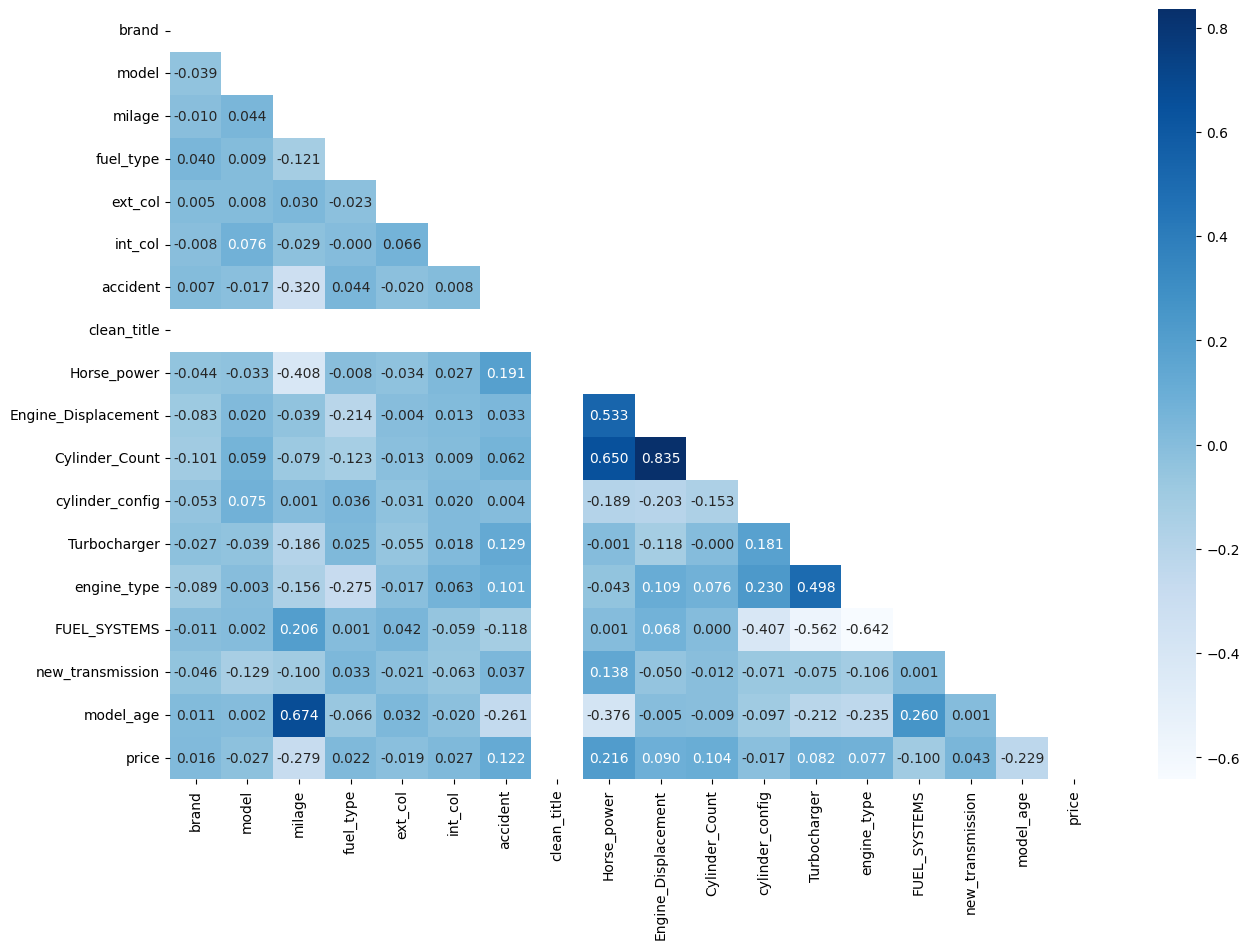

In [47]:
temp  = x_train.merge(y_train,left_index=True,right_index=True)
plt.figure(figsize=(15,10))
df_co=temp.corr()
mask = np.triu(np.ones_like(temp.corr())) 
sns.heatmap(df_co,annot=True,cmap='Blues',fmt='.3f',mask=mask)
plt.show()
# fig, ax = plt.subplots(figsize=(15, 10))
# correlations = associations(tr,ax=ax,cmap='Blues')

In [48]:
print('Percentage of Outliers in Data is ',(1-len(x_train)/len(x_train_labels))*100)

Percentage of Outliers in Data is  2.3994536750958084


> # **Model**

In [49]:
# import xgboost as xgb
# from lightgbm import LGBMRegressor
# import lightgbm as lgb

In [50]:
# xgb_model=xgb.XGBRegressor(tree_method ="hist",
#                               device               = "cuda" ,
#                           objective             = "reg:squarederror",
#                           random_state          = 42,
#                           colsample_bytree      = 0.45,
#                           learning_rate       = 0.025,
#                           max_depth          = 7,
#                           n_estimators          = 700,
#                           reg_alpha          = 0.001,
#                             reg_lambda            = 0.001,
#                             min_child_weight      = 18,
#                         enable_categorical    = True,      
                           
#                         eval_metric='rmse'  ,
#                         early_stopping_rounds=10,
#                         verbose = -1
# )
# lgb_params= {
#       'num_leaves': 426,
#      'max_depth': 20,
#      'learning_rate': 0.011353178352988012,
#      'n_estimators': 884,
#      'subsample': 0.5772552201954328,
#      'colsample_bytree': 0.9164865430101521,
#      'reg_alpha': 1.48699088003429e-06,
#      'reg_lambda': 0.41539458543414265,
#      'min_data_in_leaf': 73,
#      'feature_fraction': 0.751673655170548,
#      'bagging_fraction': 0.5120415391590843,
#      'bagging_freq': 2,
#      'min_child_weight': 0.017236362383443497,
#      'cat_smooth': 54.81317407769262,
#         'verbose':-1
# }

In [51]:
# lgb_reg = LGBMRegressor(**lgb_params,loss_function='RMSE',verbosity=-1)
# early_stopping_light = lgb.early_stopping(stopping_rounds=10)
# eval_Set = [(x_train,y_train),(x_test,y_test)]
# lgb_reg.fit(x_train,y_train,eval_set =eval_Set,callbacks=[early_stopping_light],eval_metric='rmse')
# xgb_model.fit(x_train,y_train,eval_set=eval_Set)

In [52]:
# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
# result_light  = lgb_reg.evals_result_
# epochs_light = len(result_light['training']['rmse'])
# x_axis_light = range(0, epochs_light)
# ax[0].plot(x_axis_light, result_light['training']['rmse'], label='train',c='r')
# ax[0].plot(x_axis_light, result_light['valid_1']['rmse'], label='test',c='b')
# ax[0].legend()
# ax[0].set_xlabel('epochs')
# ax[0].set_ylabel('RMSE')
# ax[0].set_title('LIGHT GBM')
# result_xgb= xgb_model.evals_result()
# epochs_xgb = len(result_xgb['validation_0']['rmse'])
# x_axis_xgb = range(0, epochs_xgb)
# ax[1].plot(x_axis_xgb, result_xgb['validation_0']['rmse'], label='train',c='r')
# ax[1].plot(x_axis_xgb, result_xgb['validation_1']['rmse'], label='test',c='b')
# ax[1].legend()
# ax[1].set_xlabel('epochs')
# ax[1].set_ylabel('RMSE')
# ax[1].set_title('XGB')
# plt.show()
# print('Best itertaion for Light GBM is ',lgb_reg.best_iteration_)
# print('Best itertaion for XGB is ',xgb_model.best_iteration)

In [53]:
# y_pred_xgb=xgb_model.predict(x_test)
# y_pred_light= lgb_reg.predict(x_test)
# y_pred_vot = np.mean([y_pred_xgb,y_pred_light],axis=0)
# print('XGB -->',mean_squared_error(y_test,y_pred_xgb,squared=False) )
# print('Light -->',mean_squared_error(y_test,y_pred_light,squared=False) )
# print('Voting -->',mean_squared_error(y_test,y_pred_vot,squared=False) )

In [54]:
# dic =  {
#     'XGB':y_pred_xgb,
#     'Light':y_pred_light,
#     'Voting':y_pred_vot
# }
# tt = pd.DataFrame(dic)
# tt.head()

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer, Dropout ,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [57]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(units=200,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [58]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [59]:
history  = model.fit(x_train,y_train,epochs = 100,batch_size=128,callbacks=early_stopping,validation_data=(x_test, y_test))

Epoch 1/100


I0000 00:00:1726309177.612170      78 service.cc:145] XLA service 0x7db8d8005720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726309177.612222      78 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726309177.612226      78 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  90/1151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6467370496.0000 - mse: 6467370496.0000

I0000 00:00:1726309180.866908      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1151/1151 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 7813819904.0000 - mse: 7813819904.0000 - val_loss: 6669931008.0000 - val_mse: 6669931008.0000
Epoch 2/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6254164992.0000 - mse: 6254164992.0000 - val_loss: 4876397056.0000 - val_mse: 4876397056.0000
Epoch 3/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5242809856.0000 - mse: 5242809856.0000 - val_loss: 4972811264.0000 - val_mse: 4972811264.0000
Epoch 4/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5768807936.0000 - mse: 5768807936.0000 - val_loss: 5032667136.0000 - val_mse: 5032667136.0000
Epoch 5/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5595624960.0000 - mse: 5595624960.0000 - val_loss: 4847972864.0000 - val_mse: 4847972864.0000
Epoch 6/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5179880960.0000 - mse: 5179880960.0000 - val_loss: 4823090688.0000 - val_mse: 4823090688.0000
Epoch 7/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 470039

In [60]:
y_pred = model.predict(x_test)
print('MLP -->',mean_squared_error(y_test,y_pred,squared=False) )

1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MLP --> 68642.79174964869


In [61]:
model.evaluate(x_test,y_test)

1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4513935872.0000 - mse: 4513935872.0000


[4711832576.0, 4711832576.0]

In [62]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

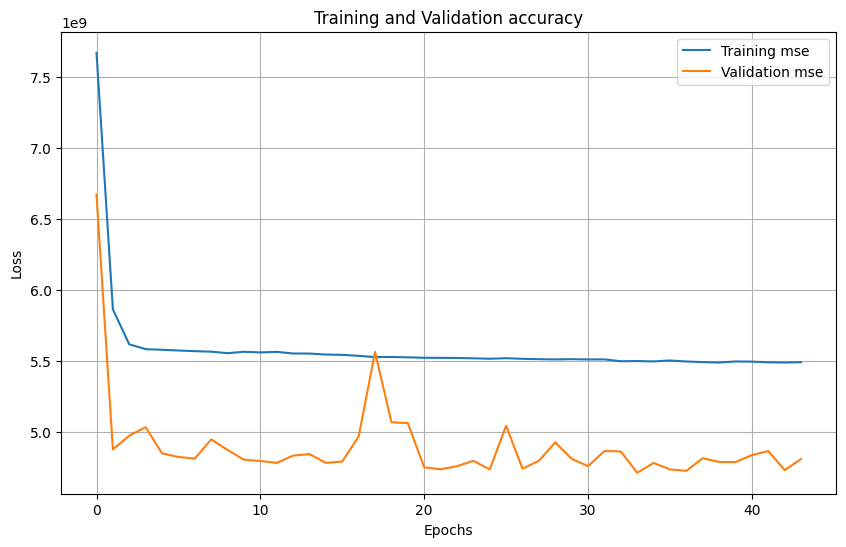

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(history.history["mse"], label="Training mse")
plt.plot(history.history["val_mse"], label="Validation mse")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
# history.history

In [64]:
# y_p1= xgb_model.predict(df_test)
# y_p2 = lgb_reg.predict(df_test)
# y_pred_vot = np.mean([y_p1,y_p2],axis=0)


In [65]:
# y_pred=y_pred.reshape(-1,)

In [66]:
y_pred_model = model.predict(df_test)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [67]:
submession = pd.DataFrame({
    'id':ts['id'].values,
    'price':y_pred_model.reshape(-1,)

})

In [68]:
submession.head()

,id,price
0,188533,18459.676
1,188534,68711.914
2,188535,56754.945
3,188536,35561.387
4,188537,28835.383


In [69]:
submession.to_csv('submession.csv', index=False)